In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Vivek's Project/csv_result-ObesityDataSet_raw_and_data_sinthetic.csv")

# Drop the ID column
df.drop(columns=['id'], inplace=True)

In [ ]:
# Separate target and features
target = 'NObeyesdad'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.87      0.95      0.91        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.88      0.92        56
Overweight_Level_II       0.92      0.98      0.95        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.95       423
       weighted avg       0.96      0.96      0.96       423



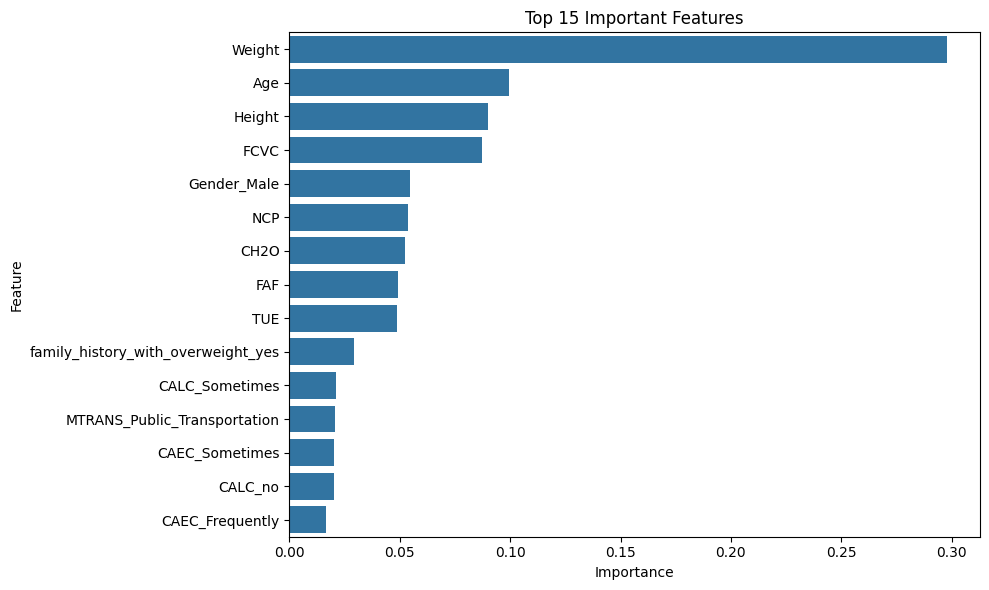

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(model, "obesity_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import pandas as pd

model = joblib.load("obesity_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Obesity Prediction App")

# Example input fields
age = st.number_input("Age", 10, 100)
height = st.number_input("Height (m)", 1.0, 2.5)
weight = st.number_input("Weight (kg)", 30, 200)

# Collect more inputs...

if st.button("Predict"):
    # Create and scale input
    user_input = pd.DataFrame([[age, height, weight, ...]], columns=[...])
    user_input_scaled = scaler.transform(user_input)
    prediction = model.predict(user_input_scaled)
    st.write(f"Predicted Obesity Level: {prediction[0]}")

2025-05-13 09:29:38.954 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.362 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-13 09:29:39.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 09:29:39.376 Session state does not 

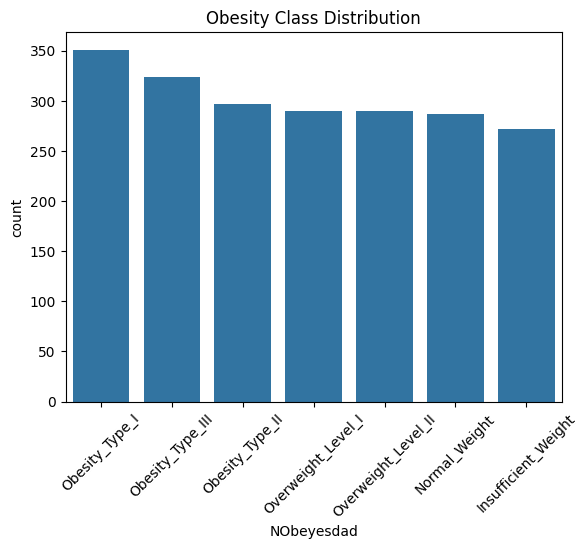

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Obesity Class Distribution")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, classification_report
)
from sklearn.linear_model import (
    LinearRegression, LogisticRegression, Ridge, Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    GradientBoostingRegressor, GradientBoostingClassifier
)
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Load dataset
# Assuming the file is in the same directory as the notebook
df = pd.read_csv("/content/drive/MyDrive/Vivek's Project/csv_result-ObesityDataSet_raw_and_data_sinthetic.csv")
# OR specify the correct path if it's different

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Target columns
reg_target = 'Weight'
clf_target = 'NObeyesdad'
X = df.drop(columns=[reg_target, clf_target])
y_reg = df[reg_target]
y_clf = df[clf_target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

# ================= REGRESSION MODELS =================
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

print("🔵 REGRESSION RESULTS")
for name, model in regressors.items():
    model.fit(X_train, y_reg_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, preds))
    r2 = r2_score(y_reg_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# ================= CLASSIFICATION MODELS =================
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

print("\n🟢 CLASSIFICATION RESULTS")
for name, model in classifiers.items():
    model.fit(X_train, y_clf_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_clf_test, preds)
    print(f"{name}: Accuracy = {acc:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_clf_test, preds)}")

# ================= CLUSTERING (KMeans) =================
print("🟣 CLUSTERING RESULTS (KMeans)")
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
print(df['Cluster'].value_counts())

🔵 REGRESSION RESULTS
Linear Regression: RMSE = 12.68, R² = 0.77
Ridge Regression: RMSE = 12.68, R² = 0.77
Lasso Regression: RMSE = 12.92, R² = 0.76
Random Forest: RMSE = 7.18, R² = 0.93
Gradient Boosting: RMSE = 7.55, R² = 0.92

🟢 CLASSIFICATION RESULTS
Logistic Regression: Accuracy = 0.72
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        56
           1       0.60      0.56      0.58        62
           2       0.76      0.64      0.69        78
           3       0.81      0.95      0.87        58
           4       0.94      1.00      0.97        63
           5       0.60      0.61      0.60        56
           6       0.55      0.52      0.54        50

    accuracy                           0.72       423
   macro avg       0.71      0.72      0.71       423
weighted avg       0.72      0.72      0.72       423

Random Forest: Accuracy = 0.91
Classification Report for Random F

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

st.set_page_config(page_title="Obesity Prediction", layout="wide")
st.title("🍔 Obesity Level Estimation - Regression & Classification")

# Load dataset
@st.cache_data
def load_data():
    df = pd.read_csv("/content/drive/MyDrive/Vivek's Project/csv_result-ObesityDataSet_raw_and_data_sinthetic.csv")
    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col])
    return df

df = load_data()
st.subheader("📊 Dataset Overview")
st.write(df.head())

# Feature setup
regression_target = 'Weight'
classification_target = 'NObeyesdad'
X = df.drop(columns=[regression_target, classification_target])
y_reg = df[regression_target]
y_clf = df[classification_target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_reg_train, y_reg_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

# Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM Classifier": SVC()
}

# Regression section
st.subheader("📈 Regression Models")
reg_results = []
for name, model in regression_models.items():
    model.fit(X_train, y_reg_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, pred))
    reg_results.append((name, rmse))

st.dataframe(pd.DataFrame(reg_results, columns=["Model", "RMSE"]).sort_values(by="RMSE"))

# Classification section
st.subheader("🔍 Classification Models")
clf_results = []
for name, model in classification_models.items():
    model.fit(X_train, y_clf_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_clf_test, pred)
    clf_results.append((name, acc))

st.dataframe(pd.DataFrame(clf_results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False))

# User Input Prediction
st.subheader("🎯 Predict Obesity Level from Your Input")

with st.form("predict_form"):
    user_input = []
    for col in X.columns:
        val = st.slider(f"{col}", float(df[col].min()), float(df[col].max()), float(df[col].mean()))
        user_input.append(val)

    submitted = st.form_submit_button("Predict")

    if submitted:
        input_array = np.array(user_input).reshape(1, -1)
        input_scaled = scaler.transform(input_array)

        selected_reg_model = RandomForestRegressor()
        selected_reg_model.fit(X_train, y_reg_train)
        weight_pred = selected_reg_model.predict(input_scaled)

        selected_clf_model = RandomForestClassifier()
        selected_clf_model.fit(X_train, y_clf_train)
        obesity_pred = selected_clf_model.predict(input_scaled)

        st.success(f"🏋️ Estimated Weight: {weight_pred[0]:.2f} kg")
        st.success(f"🧪 Predicted Obesity Level (class): {obesity_pred[0]}")


2025-05-08 07:03:33.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.012 No runtime found, using MemoryCacheStorageManager
2025-05-08 07:03:34.016 No runtime found, using MemoryCacheStorageManager
2025-05-08 07:03:34.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 07:03:34.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

In [ ]:
pip install streamlit scikit-learn pandas numpy

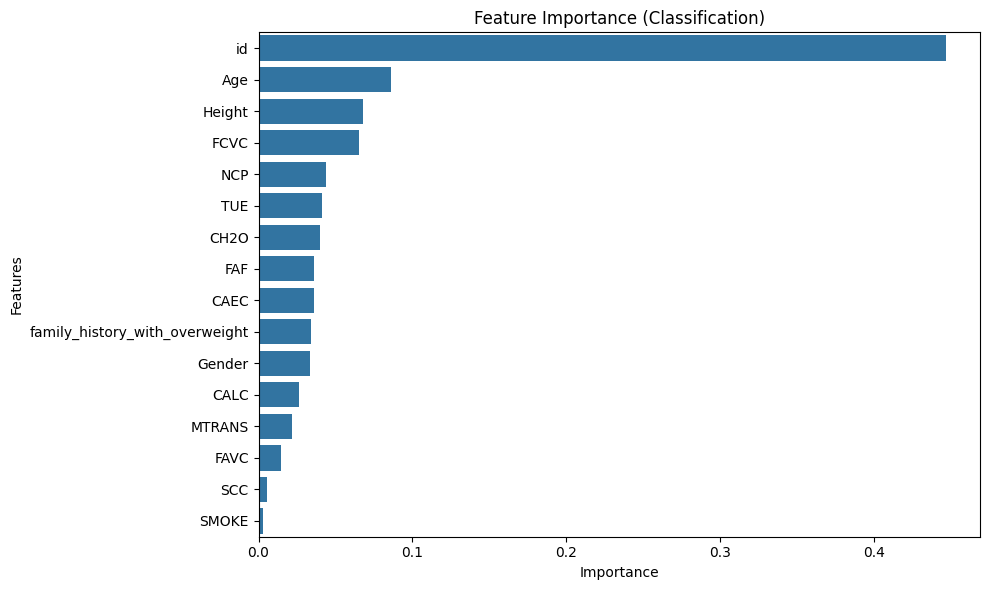

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# After fitting Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_clf_train)

# Plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title("Feature Importance (Classification)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

100%|===================| 2957/2961 [01:29<00:00]       

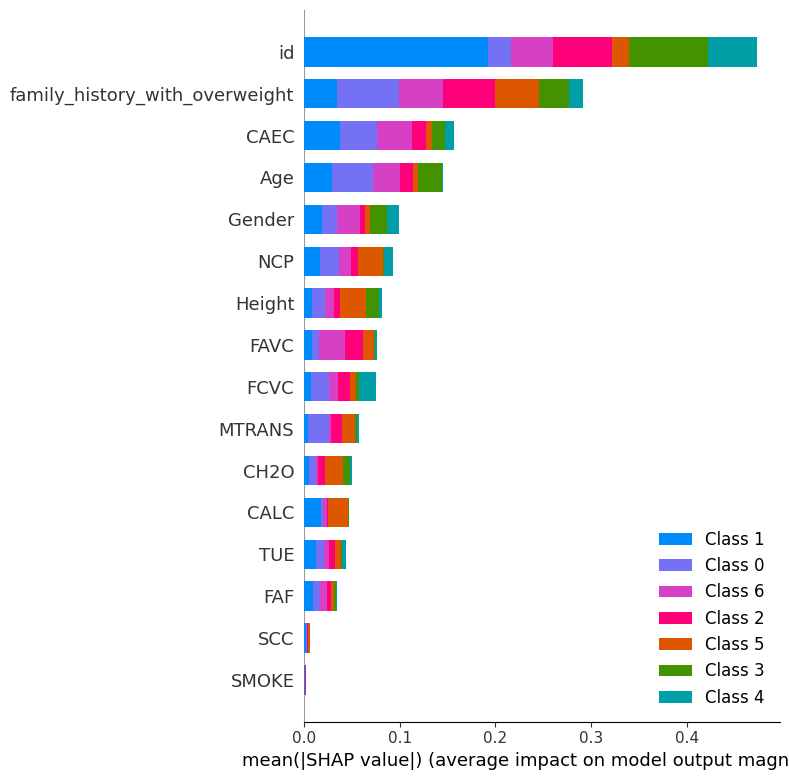

In [ ]:
import shap

# SHAP values from trained Random Forest
explainer = shap.Explainer(rf, X_train)
# Ensure X_test is scaled using the same scaler used during training
shap_values = explainer(scaler.transform(X_test)) # Apply the scaler to X_test before passing it to the explainer

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

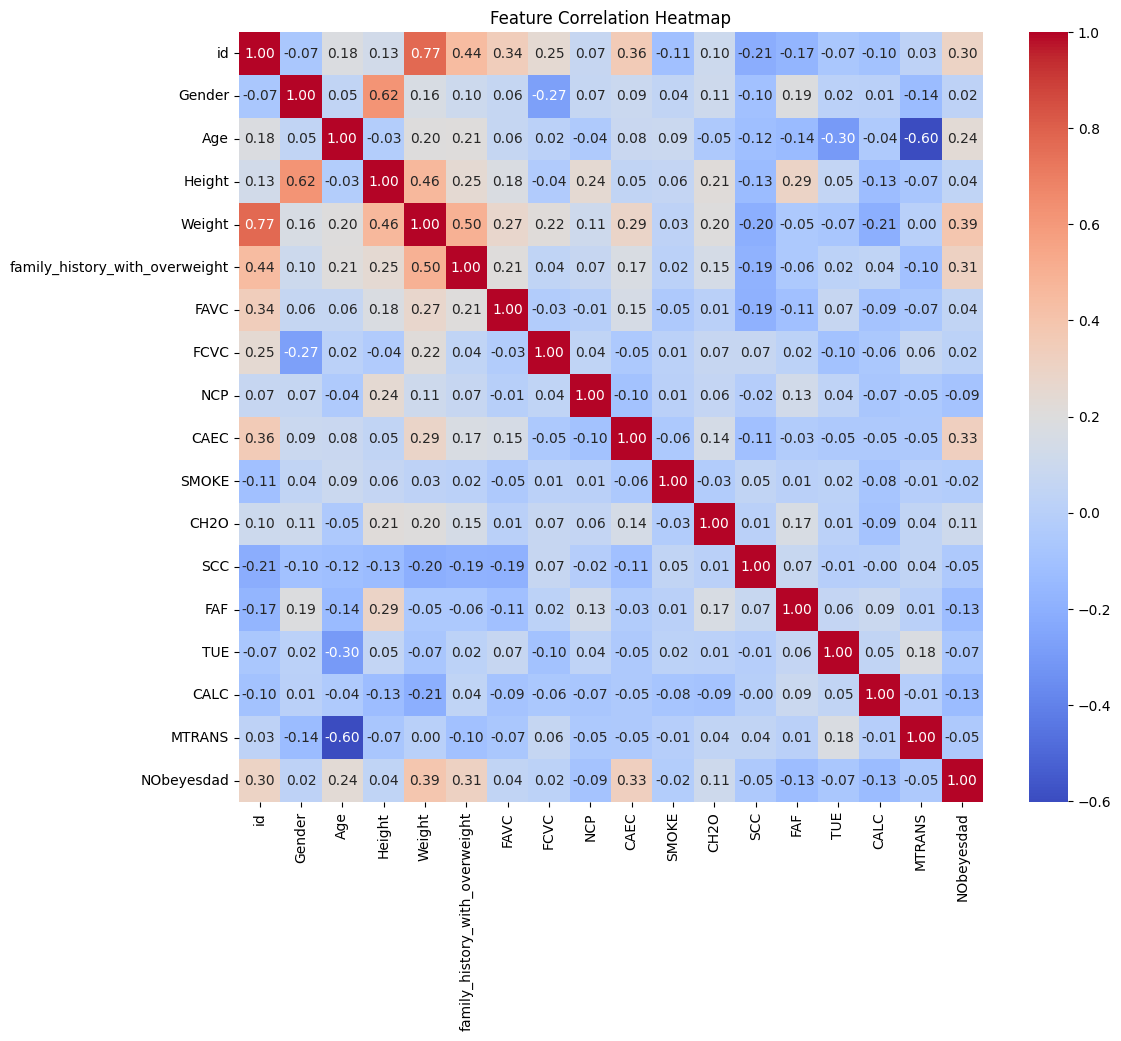

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()